### Mudstone classification based on Pires de Lima et al, 2021)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


C:\Users\ferreira\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ferreira\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ferreira\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Quantity of images

In [2]:
ls = ["AMdst", "BMdst", "MCcSt", "MCSt"]
for i in ls:    
    print(len(os.listdir(i)))

84
155
125
153


In [6]:
batch_size = 40

In [4]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('AMdst/sample_15_10X_PP_2.jpg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

<class 'numpy.ndarray'>
(484, 646, 3)


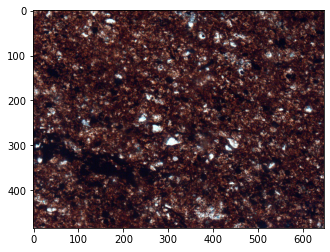

In [8]:
plt.imshow(image)